---
### $K$-Nearest Neighbors
---

We will work with Ronald Fischer’s dataset, dating back to 1936, which contains data on iris flowers.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = sns.load_dataset("iris")

`iris` contains the data in the form of a `DataFrame`: this is a data type provided by the Pandas library, which allows storing data in the form of a table where the columns are named, and provides a wide range of functions for exploring and manipulating this data. We can display the first 5 rows with the following command.

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We see that the first 4 columns correspond to the sepal length, sepal width, petal length, and petal width (all these measurements are in centimeters). These 4 variables will form the input. The fifth column corresponds to the iris species (which can be: *Setosa*, *Versicolor*, or *Virginica*) and is the output. This is a classification problem: we want to build a predictor that predicts the species based on the other characteristics. Furthermore, the `DataFrame` contains 150 rows: this is the number of data points.

We first want to simplify the dataset by reducing the dimensionality of the input space from 4 to 2. The goal is to determine which two explanatory variables seem most promising for predicting the species. To do this, we will use the `sns.pairplot` function from the Seaborn library.

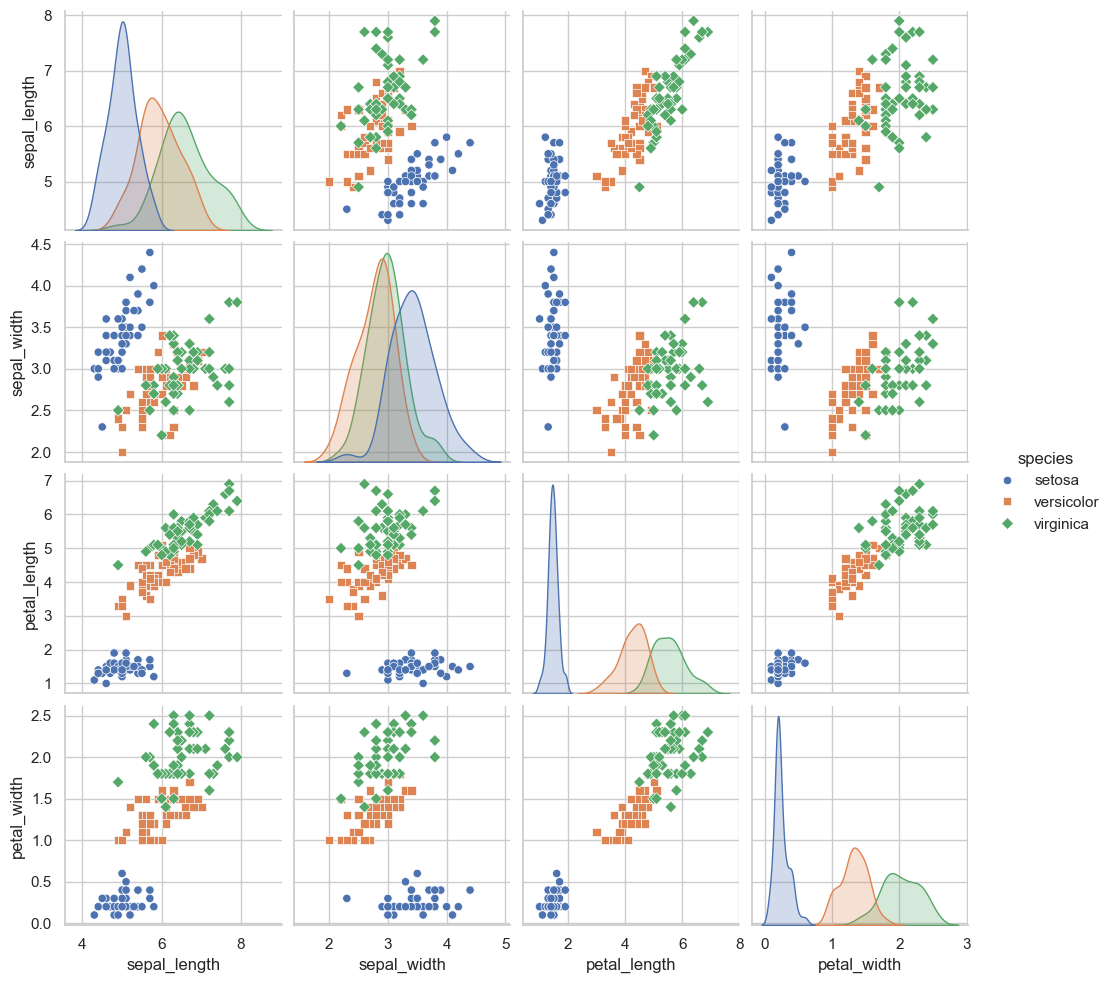

In [8]:
# Set Seaborn's default aesthetics for better visualization
sns.set_style("whitegrid")  # Use a grid background for better readability

# Create a pairplot of the iris dataset with color distinction based on species
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.show()

---

**Question 3.** — Choose the two explanatory variables that seem most promising for predicting the species, that is, the ones that, in the figure, seem to best separate the different species. Create an `array X` containing the columns corresponding to the two selected explanatory variables, and an `array y` containing the column corresponding to the species (we will need to use `iris.values`, which returns all the data from the `DataFrame iris` as a `NumPy array`).

$\rightarrow$ The two explanatory variables that seem to best separate the species are `petal_length` and `petal_width`. These variables show the most distinct clustering of species in the pairplot, making them strong predictors for classification.

In [9]:
# Select the two best explanatory variables (petal_length and petal_width)
X = iris[["petal_length", "petal_width"]].values

# Extract the target variable (species)
y = iris["species"].values

# Display the shape of the arrays
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 2)
Shape of y: (150,)


We now wish to split the dataset into two samples: a training set of size 90, and a test set of size 60. One idea would be to use the first 90 data points to form the training sample and the last 60 to form the test sample.

In [10]:
# Split the dataset into training and test sets (without shuffling)
X_train = X[:90]  # First 90 samples for training
y_train = y[:90]  # First 90 corresponding labels
X_test = X[90:]   # Remaining 60 samples for testing
y_test = y[90:]   # Remaining 60 corresponding labels

# Print the shapes to confirm the split
print("Training set size (X_train):", X_train.shape)
print("Training labels size (y_train):", y_train.shape)
print("Test set size (X_test):", X_test.shape)
print("Test labels size (y_test):", y_test.shape)

Training set size (X_train): (90, 2)
Training labels size (y_train): (90,)
Test set size (X_test): (60, 2)
Test labels size (y_test): (60,)


**Question 3.** — Observe the resulting samples and explain why they might be problematic.